# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**


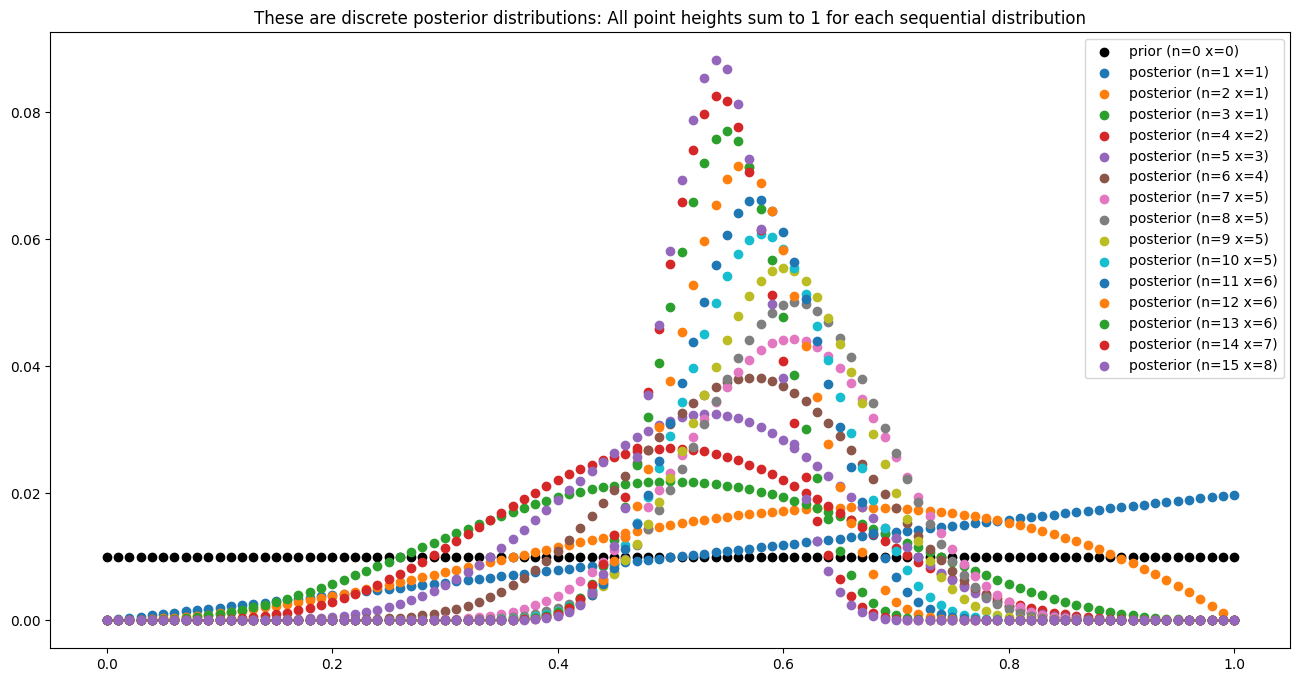

In [4]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

np.random.seed(42)  # For reproducibility
true_theta = 0.6
observations = np.random.binomial(1, true_theta, 15)

n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    # use these for batch updates based on a binomial distribution
    
    likelihood = stats.binom.pmf(x, n, parameter_domain)
    posterior = likelihood * prior
    posterior /= posterior.sum()  # Normalize to make it a proper distribution
    prior = posterior  # for each Bernoulli observation update
    
    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend();


### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*


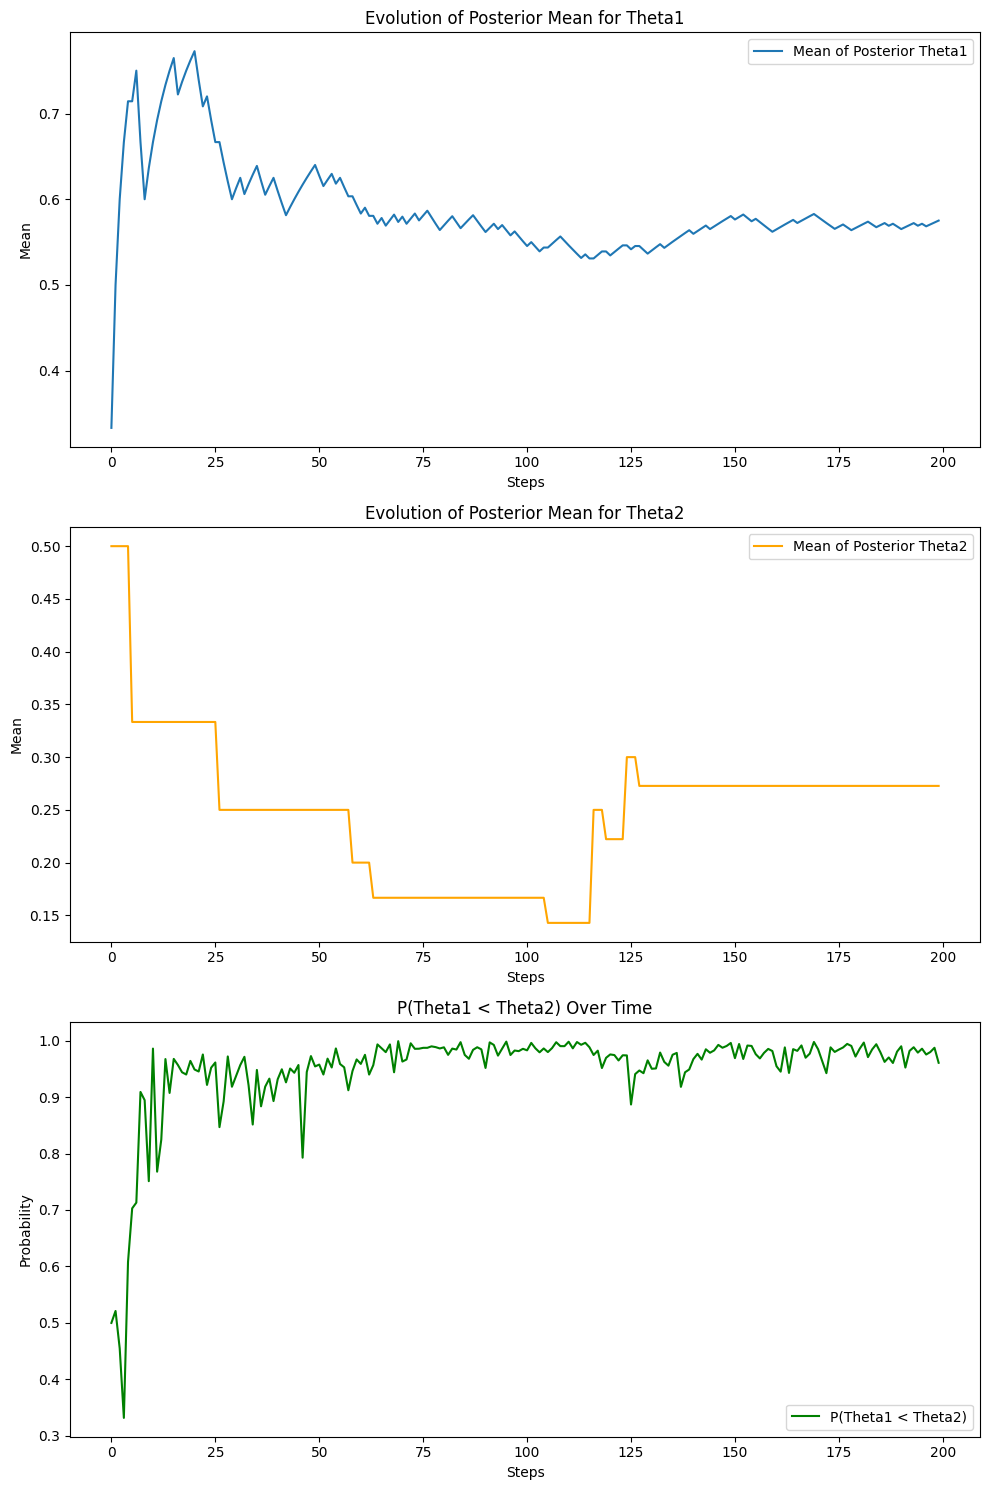

In [ ]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Initialize parameters
np.random.seed(42)
theta1_true = 0.7
theta2_true = 0.5 
alpha1, beta1 = 1, 1  
alpha2, beta2 = 1, 1 

n_steps = 200  # Number of steps
n1, x1 = 0, 0  # Counts for arm 1
n2, x2 = 0, 0  # Counts for arm 2

posterior_theta1 = []
posterior_theta2 = []
prob_theta1_less_theta2 = []

# Bayesian multi-armed bandit algorithm
for t in range(n_steps):
    # Sample from posterior distributions
    theta1_sample = np.random.beta(alpha1 + x1, beta1 + n1 - x1)
    theta2_sample = np.random.beta(alpha2 + x2, beta2 + n2 - x2)
    
    # Calculate P(theta1 < theta2)
    prob_theta1_less_theta2.append(beta.cdf(theta1_sample, alpha2 + x2, beta2 + n2 - x2))
    
    # Choose arm based on comparison
    if theta1_sample < theta2_sample:
        outcome = np.random.binomial(1, theta2_true)  # Pull arm 2
        n2 += 1
        x2 += outcome
    else:
        outcome = np.random.binomial(1, theta1_true)  # Pull arm 1
        n1 += 1
        x1 += outcome
    
    # Track posterior parameters
    posterior_theta1.append((alpha1 + x1, beta1 + n1 - x1))
    posterior_theta2.append((alpha2 + x2, beta2 + n2 - x2))

# Visualization
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
steps = np.arange(n_steps)

# Posterior evolution for theta1
axes[0].plot(steps, [alpha / (alpha + beta) for alpha, beta in posterior_theta1], label="Mean of Posterior Theta1")
axes[0].set_title("Evolution of Posterior Mean for Theta1")
axes[0].set_xlabel("Steps")
axes[0].set_ylabel("Mean")
axes[0].legend()

# Posterior evolution for theta2
axes[1].plot(steps, [alpha / (alpha + beta) for alpha, beta in posterior_theta2], label="Mean of Posterior Theta2", color="orange")
axes[1].set_title("Evolution of Posterior Mean for Theta2")
axes[1].set_xlabel("Steps")
axes[1].set_ylabel("Mean")
axes[1].legend()

# Probability that theta1 < theta2
axes[2].plot(steps, prob_theta1_less_theta2, label="P(Theta1 < Theta2)", color="green")
axes[2].set_title("P(Theta1 < Theta2) Over Time")
axes[2].set_xlabel("Steps")
axes[2].set_ylabel("Probability")
axes[2].legend()

plt.tight_layout()
plt.show()



### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

The Beta-Binomial manner observes each entity independently and it tends to be very volatile in the beginning steps. As we explore more data, the posterior mean becomes more stable and converges to the true probabilities set.

The Dirichlet-multinomial model takes consideration of the other two entities while collecting new data, hence having a smoother curve ealier on as well. However, it significantly underestimates the entities because I set entity 2 (the lowest possibility) to have a stronger prior compared to the other two. However, since entity 1 has the best probability of success (0.7), the algorithm continues to exploit entity 1 and doesn't leave enough trials to the other two to be successful.

In a real worls AB testing context, I think it would largely depend on the nature of the scenario we are trying to test. If the entities are truly independent to each other, then the Beta-Binomial method would be appropriate. On the other hand, if the entities are related and/or have overlapping implications, the Dirichlet-multinomial method might be better. In addition, the Dirichlet-multinomial method is good when we don't have that much data to explore and want to find the optimal entity fast because it focuses on the exploitation aspect.

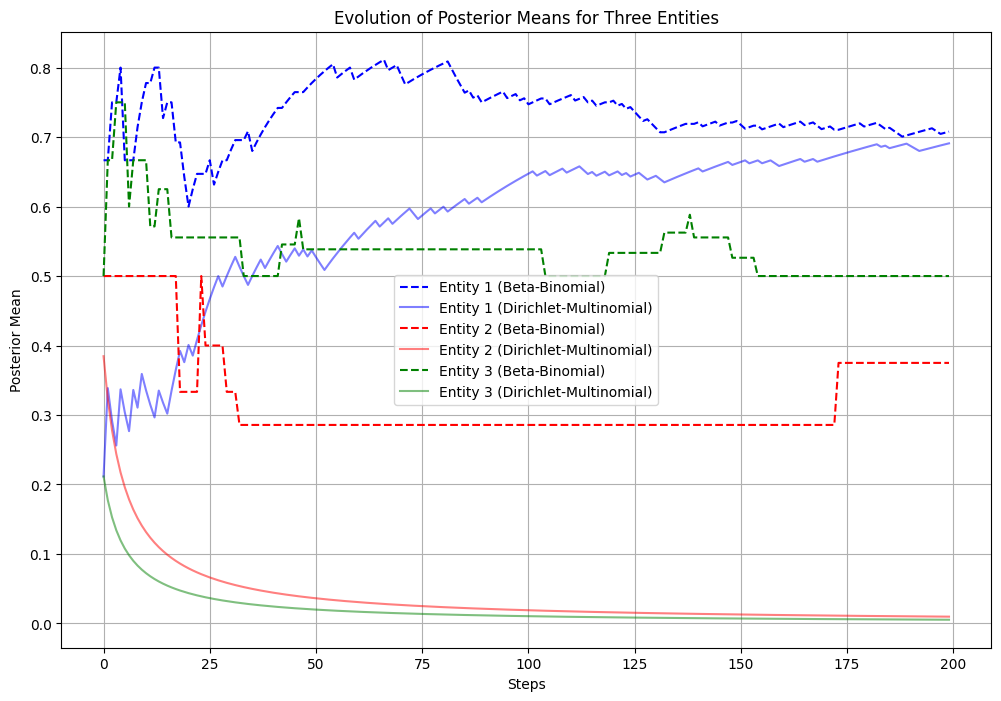

In [28]:
import numpy as np
from scipy.stats import beta, dirichlet
import matplotlib.pyplot as plt

# True success probabilities for the three entities
np.random.seed(42)
true_theta = [0.7, 0.2, 0.4] 

# Initialize Beta-Binomial parameters
alpha_beta = [1, 1, 1] 
beta_beta = [1, 1, 1]

# Initialize counts for Beta-Binomial model
n_beta = [0, 0, 0]  # Trials for Beta-Binomial model
x_beta = [0, 0, 0]  # Successes for Beta-Binomial model

# Initialize Dirichlet-Multinomial parameters
alpha_dirichlet = [1.1, 2, 1.1]  # Dirichlet priors for joint analysis

# Counts for Dirichlet-Multinomial model
n_dirichlet = [0, 0, 0]  # Trials for Dirichlet-Multinomial model
x_dirichlet = [0, 0, 0]  # Successes for Dirichlet-Multinomial model

# Number of iterations
n_steps = 200

# Store posterior means for visualization
posterior_means_beta = [[] for _ in range(3)]
posterior_means_dirichlet = [[] for _ in range(3)]

# Run the simulation
for t in range(n_steps):
    # Beta-Binomial model: Sample success probabilities independently
    sampled_theta_beta = [np.random.beta(alpha_beta[i] + x_beta[i], beta_beta[i] + n_beta[i] - x_beta[i]) for i in range(3)]

    # Dirichlet-Multinomial model: Sample success probabilities jointly
    sampled_theta_dirichlet = np.random.dirichlet([alpha_dirichlet[i] + x_dirichlet[i] for i in range(3)])

    # Choose an entity for Beta-Binomial (argmax strategy)
    chosen_entity_beta = np.argmax(sampled_theta_beta)

    # Choose an entity for Dirichlet-Multinomial (argmax strategy)
    chosen_entity_dirichlet = np.argmax(sampled_theta_dirichlet)

    # Simulate outcomes (binary success/failure) for each model
    outcome_beta = np.random.binomial(1, true_theta[chosen_entity_beta])
    outcome_dirichlet = np.random.binomial(1, true_theta[chosen_entity_dirichlet])

    # Update counts for Beta-Binomial model
    n_beta[chosen_entity_beta] += 1
    x_beta[chosen_entity_beta] += outcome_beta

    # Update counts for Dirichlet-Multinomial model
    n_dirichlet[chosen_entity_dirichlet] += 1
    x_dirichlet[chosen_entity_dirichlet] += outcome_dirichlet

    # Store posterior means
    for i in range(3):
        # Independent Beta-Binomial posterior mean
        posterior_means_beta[i].append((alpha_beta[i] + x_beta[i]) / (alpha_beta[i] + beta_beta[i] + n_beta[i]))
        # Joint Dirichlet-Multinomial posterior mean
        posterior_means_dirichlet[i].append((alpha_dirichlet[i] + x_dirichlet[i]) / (sum(alpha_dirichlet) + sum(n_dirichlet)))

# Plot the posterior means over time
colors = ["blue", "red", "green"]

plt.figure(figsize=(12, 8))
for i in range(3):
    plt.plot(range(n_steps), posterior_means_beta[i], label=f"Entity {i+1} (Beta-Binomial)", color=colors[i], linestyle='--')
    plt.plot(range(n_steps), posterior_means_dirichlet[i], label=f"Entity {i+1} (Dirichlet-Multinomial)", color=colors[i], alpha = 0.5)
plt.xlabel("Steps")
plt.ylabel("Posterior Mean")
plt.title("Evolution of Posterior Means for Three Entities")
plt.legend()
plt.grid()
plt.show()
